In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the grid from the file
grid = pd.read_excel('Grid.xlsx', header=None)

# Display the first 5 rows
grid.head(5)



,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-5,-4,6,0,14,-4,-2,6,14,2,...,-5,-10,2,-3,10,-2,-8,-1,7,25
1,10,-2,9,7,11,-3,11,14,5,12,...,-1,-4,2,7,2,13,10,1,-9,-10
2,4,-2,-9,10,-7,4,-6,14,7,3,...,-8,0,-7,0,8,-10,14,6,-1,3
3,-3,-7,4,7,10,9,4,6,3,1,...,2,4,10,7,-6,1,5,-8,5,10
4,-7,-4,-7,6,6,-9,13,14,2,-10,...,9,-1,9,4,14,-4,12,1,13,2


Total reward accumulated along the path:  385


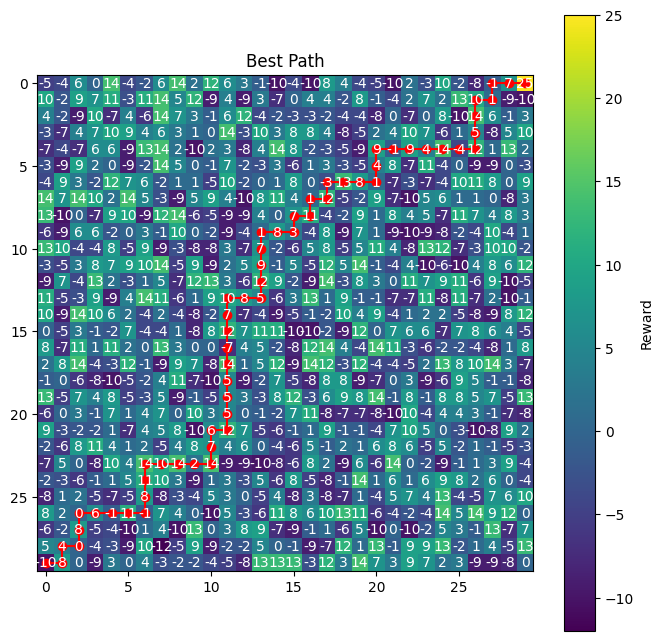

In [ ]:
grid = pd.read_excel('Grid.xlsx', header=None).values

#Define the hyperparameters
alpha = 0.6  # Learning rate
gamma = 0.8  # Discount factor
num_episodes = 60000  # Total number of episodes

#Define the Q-Table
q_table = np.zeros((grid.shape[0], grid.shape[1], 2))  #Grid size with 2 actions (up and right)

#define the Reward Function
def get_reward(state):
    return grid[state[0], state[1]]

#define the epsilon-greedy policy
def epsilon_greedy_policy(state, epsilon):
    valid_actions = []
    if state[0] > 0:  #Able move up
        valid_actions.append(1)
    if state[1] < grid.shape[1] - 1:  #able move right
        valid_actions.append(0)

    if np.random.uniform() < epsilon or not valid_actions:
        return np.random.choice(valid_actions) if valid_actions else 0
    else:
        return np.argmax([q_table[state[0], state[1], a] for a in valid_actions])

#Q-Learning algorithm
for episode in range(num_episodes):
    state = [grid.shape[0] - 1, 0]  #Start at bottom-left cell
    done = False
    while not done:
        action = epsilon_greedy_policy(state, epsilon=0.1)
        if action == 1 and state[0] > 0:
            next_state = [state[0] - 1, state[1]]  #Move up
        elif action == 0 and state[1] < grid.shape[1] - 1:
            next_state = [state[0], state[1] + 1]  #Move right
        else:
            continue  #Skip the rest of the loop if the action is not valid

        reward = get_reward(next_state)
        q_table[state[0], state[1], action] = (1 - alpha) * q_table[state[0], state[1], action] + alpha * (reward + gamma * np.max(q_table[next_state[0], next_state[1], :]))
        state = next_state

        if state == [0, grid.shape[1] - 1]:  #Top-right cell
            done = True #End of path

#find the optmal path and calclate the total reward
path = [(grid.shape[0] - 1, 0)]
state = [grid.shape[0] - 1, 0]
total_reward = get_reward(state)  #Initialize Total Reward With The Starting Cell

while state != [0, grid.shape[1] - 1]:
    action = np.argmax(q_table[state[0], state[1]])
    if action == 1:
        state = [state[0] - 1, state[1]] #Move_up
    else:
        state = [state[0], state[1] + 1] #Move_right
    path.append((state[0], state[1])) #Add to path
    total_reward += get_reward(state)  # accumulate reward

#print reward
print("Total reward accumulated along the path: ", total_reward)

#plotting the path
plt.figure(figsize=(8, 8))
plt.imshow(grid, cmap='viridis')
plt.colorbar(label='Reward')

#plot the path
ys, xs = zip(*path)
plt.plot(xs, ys, color='red', marker='o')  #path is plotted in red
for i in range(grid.shape[0]):
    for j in range(grid.shape[1]):
        plt.text(j, i, str(grid[i, j]), ha='center', va='center', color='white')

plt.title('Best Path')
plt.show()